<a href="https://colab.research.google.com/github/mounikavemala/medical_appointment_predictor/blob/main/medical_appointment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 📌 1. Importing Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Enable visualizations inside the notebook
%matplotlib inline

# 📌 2. Load the Dataset
url = "/content/KaggleV2-May-2016.csv.zip"  # Example dataset URL
df = pd.read_csv(url)

# Show the first few rows
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
# 📌 3. Data Cleaning & Preprocessing

# Rename columns for ease
df.columns = [col.strip().replace("-", "_").replace(" ", "_") for col in df.columns]

# Convert date columns to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# Feature engineering: waiting time in days
df['WaitingDays'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days
df['AppointmentWeekDay'] = df['AppointmentDay'].dt.day_name()

# Convert No-show to binary (0 = showed up, 1 = no-show)
df['No_show'] = df['No_show'].map({'No': 0, 'Yes': 1})

# Drop irrelevant columns
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

# Remove invalid ages (negative values)
df = df[df['Age'] >= 0]

# Basic data info
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   Gender              110526 non-null  object             
 1   ScheduledDay        110526 non-null  datetime64[ns, UTC]
 2   AppointmentDay      110526 non-null  datetime64[ns, UTC]
 3   Age                 110526 non-null  int64              
 4   Neighbourhood       110526 non-null  object             
 5   Scholarship         110526 non-null  int64              
 6   Hipertension        110526 non-null  int64              
 7   Diabetes            110526 non-null  int64              
 8   Alcoholism          110526 non-null  int64              
 9   Handcap             110526 non-null  int64              
 10  SMS_received        110526 non-null  int64              
 11  No_show             110526 non-null  int64              
 12  WaitingDays         1

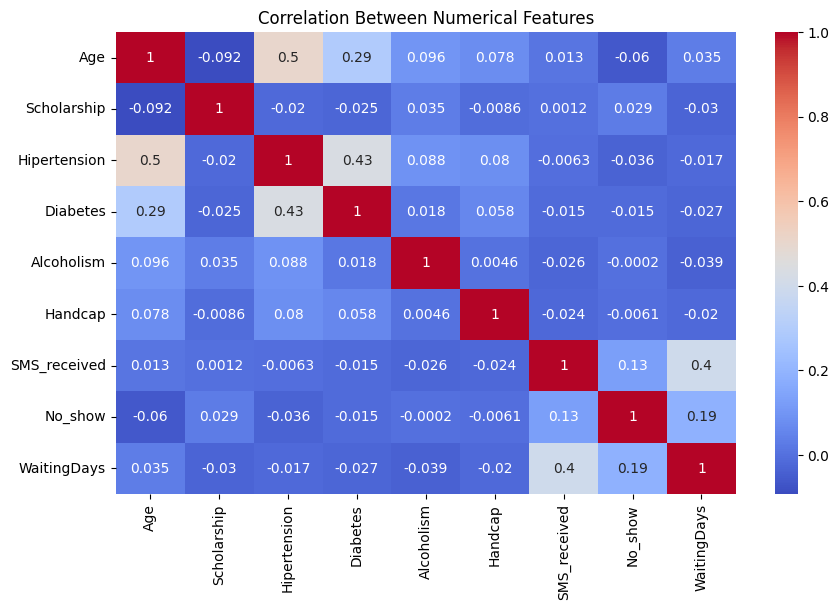

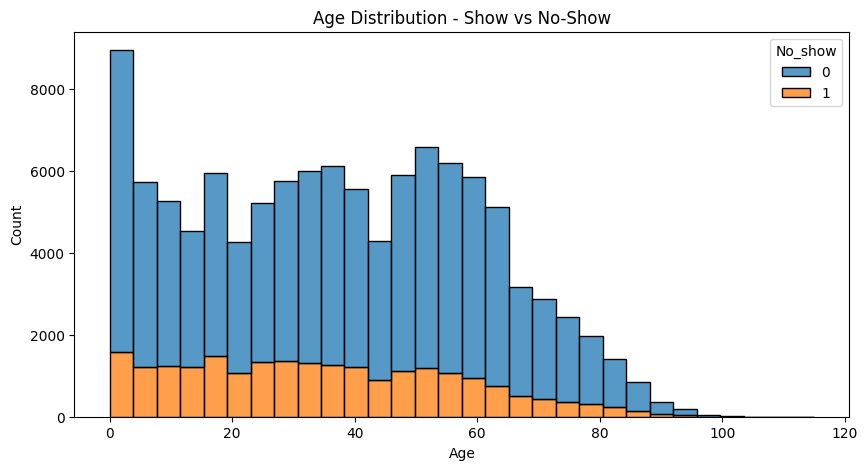

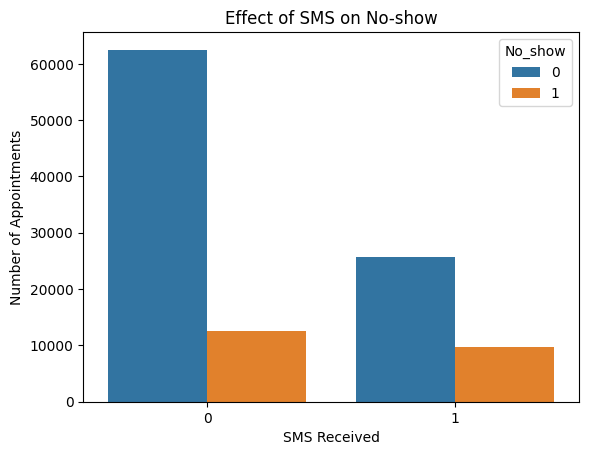

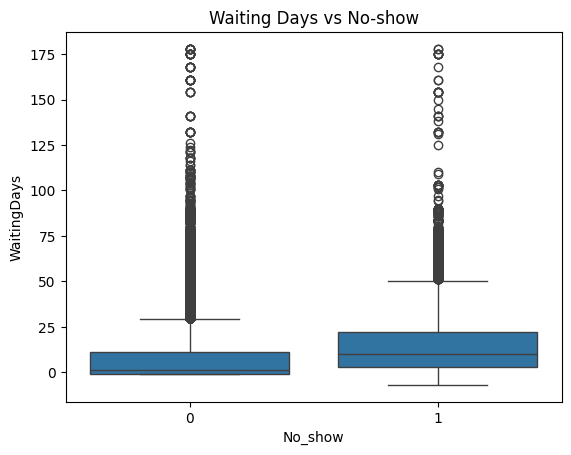

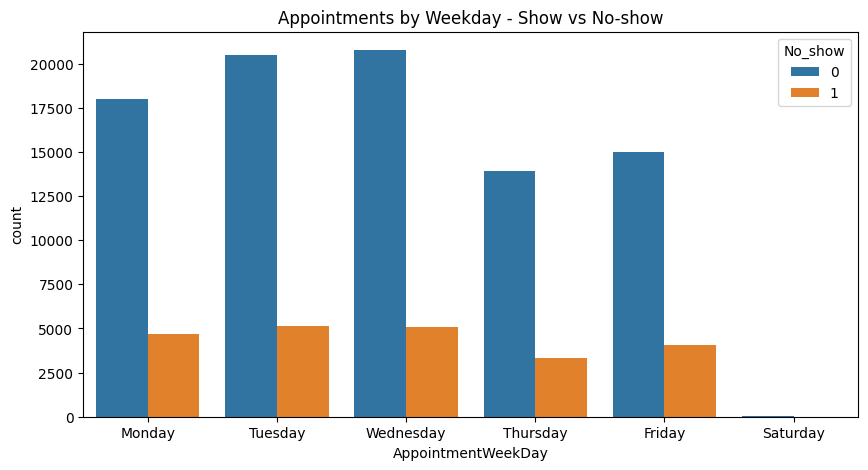

In [ ]:
# 📊 4. Exploratory Data Analysis (EDA) using Seaborn

# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Numerical Features")
plt.show()

# Show rate by age
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Age', hue='No_show', multiple='stack', bins=30)
plt.title("Age Distribution - Show vs No-Show")
plt.show()

# SMS Received vs No-show
sns.countplot(x='SMS_received', hue='No_show', data=df)
plt.title("Effect of SMS on No-show")
plt.xlabel("SMS Received")
plt.ylabel("Number of Appointments")
plt.show()

# Waiting Days
sns.boxplot(x='No_show', y='WaitingDays', data=df)
plt.title("Waiting Days vs No-show")
plt.show()

# Appointments by Day of Week
plt.figure(figsize=(10,5))
sns.countplot(x='AppointmentWeekDay', hue='No_show', data=df, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
plt.title("Appointments by Weekday - Show vs No-show")
plt.show()

In [ ]:
# 📌 5. Feature Summary

# Group analysis
summary = df.groupby('No_show').agg({
    'Age': 'mean',
    'WaitingDays': 'mean',
    'Scholarship': 'mean',
    'Hipertension': 'mean',
    'Diabetes': 'mean',
    'Alcoholism': 'mean',
    'SMS_received': 'mean'
}).T

summary.columns = ['Showed Up', 'No-Show']
summary['Difference'] = summary['No-Show'] - summary['Showed Up']
summary.round(2)


,Showed Up,No-Show,Difference
Age,37.79,34.32,-3.47
WaitingDays,7.75,14.83,7.08
Scholarship,0.09,0.12,0.02
Hipertension,0.20,0.17,-0.04
Diabetes,0.07,0.06,-0.01
Alcoholism,0.03,0.03,-0.00
SMS_received,0.29,0.44,0.15
